In [1]:
from matplotlib import pyplot as plt, image as mpimg # peut aussi se faire avec openCv => import cv2
import numpy as np 
import pandas as pd 
import os

In [2]:
os.getcwd()

'C:\\Users\\jujus\\OneDrive\\Documents\\github\\ownNeuralNetwork'

In [3]:
img = mpimg.imread(str(os.getcwd())+"\\training set\\0\\ori 0.jpg")
# couleurs img entre 0 et 255 => 255 blanc et 0 noir 
line, col , rgb = img.shape # 200 lignes, 200 colonnes, RGB 

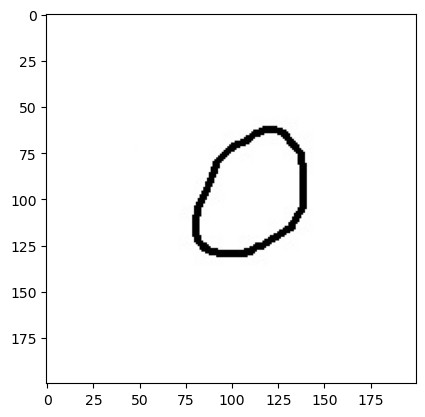

In [4]:
plt.imshow(img)

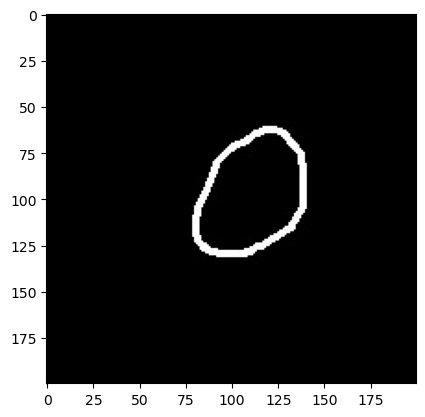

In [7]:
modif = np.zeros_like(img) # matrice de la même taille que mon image uniquement remplie de 0 
modif = 255 - img # inversion couleur  
plt.imshow(modif)